# Machine Learning Homework 3

Michael Li

Nov 12, 2017

Abstract:

- Apply classification algorithms on MNIST dataset and compare results.
- Tune classification models to find the best predicting accuracy.

## Environment setup

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import sklearn
import timeit
import datetime
# Suppress warnings
import warnings
warnings.simplefilter('ignore')

## Load and cleanse dataset 

In [2]:
# load dataset
mnisttt = input_data.read_data_sets(".", one_hot=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
# define function to plot images
def image_plot(image, size):
    idxs = np.random.randint(len(image), size=size)
    plt.clf()
    f, axarr = plt.subplots(1, size, figsize = (20,20))
    for i in range(0,len(idxs)):
        X = mnisttt.train.images[idxs[i]]
        X = X.reshape([28, 28])
        axarr[i].imshow(X)
        axarr[i].set_axis_off()
    plt.show()

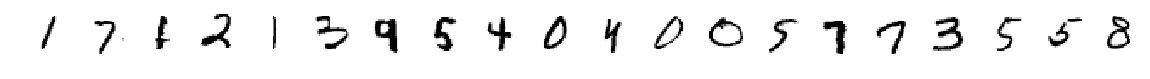

In [4]:
# plot 20 random images
image_plot(mnisttt.train.images, 20)

In [5]:
# print dataset size
print('The size of training image dataset is: ', mnisttt.train.images.shape)
print('The size of training label dataset is: ', mnisttt.train.labels.shape)
print('The size of validation image dataset is: ', mnisttt.validation.images.shape)
print('The size of validation label dataset is: ', mnisttt.validation.labels.shape)
print('The size of testing image dataset is: ', mnisttt.test.images.shape)
print('The size of testing label dataset is: ', mnisttt.test.labels.shape)

The size of training image dataset is:  (55000, 784)
The size of training label dataset is:  (55000,)
The size of validation image dataset is:  (5000, 784)
The size of validation label dataset is:  (5000,)
The size of testing image dataset is:  (10000, 784)
The size of testing label dataset is:  (10000,)


Since the requirement is to run classification algorithms on training data (60,000) and testing data (10,000) respectively, the training and validation datasets should be concatenated as one.

In [6]:
# concatenate training and validation data
train_image = np.append(mnisttt.train.images,mnisttt.validation.images, axis = 0) 
train_label = np.append(mnisttt.train.labels,mnisttt.validation.labels, axis = 0) 

# copy test labels to a new numpy array
test_label = mnisttt.test.labels

In [7]:
# print the size of training image and label dataset
print('The size of training image dataset is: ', train_image.shape)
print('The size of training label dataset is: ', train_label.shape)

The size of training image dataset is:  (60000, 784)
The size of training label dataset is:  (60000,)


In [8]:
# Normalize training and testing data
from sklearn.preprocessing import scale
train_image = scale(train_image)
test_image = scale(mnisttt.test.images)

## Basic classification models 

### Classifier 1: Perceptron

In [9]:
# fit perceptron with training dataset
start = timeit.default_timer()

from sklearn.linear_model import Perceptron
clf_p = Perceptron()
clf_p.fit(train_image, train_label)

stop = timeit.default_timer()
clf_p_time = stop - start
print('Running time: %.3fs' % (stop - start))

Running time: 3.891s


In [10]:
# get the accuracy of training dataset
clf_p_train_score = clf_p.score(train_image, train_label)
print(clf_p_train_score)

0.883883333333


In [11]:
# get the accuracy of test dataset
clf_p_test_score = clf_p.score(test_image, test_label)
print(clf_p_test_score)

0.8747


### Classifier 2: Logistic Regression

In [12]:
# Random sample a smaller dataset
from sklearn.utils import resample
train_image_sample = resample(train_image, n_samples = 20000, random_state = 0)
train_label_sample = resample(train_label, n_samples = 20000, random_state = 0)

In [13]:
# fit logistic regression with training sample dataset
start = timeit.default_timer()

from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression(penalty = 'l2', C = 1, solver ='newton-cg')
clf_logit.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_logit_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 122.940


In [14]:
# get the accuracy of training sample
clf_logit_train_score = clf_logit.score(train_image, train_label)
print(clf_logit_train_score)

0.91045


In [15]:
# get the accuracy of testing dataset
clf_logit_test_score = clf_logit.score(test_image, test_label)
print(clf_logit_test_score)

0.8958


### Classifier 3: Linear SVM 

In [16]:
# fit linear svm with training sample dataset
start = timeit.default_timer()

from sklearn.svm import LinearSVC
clf_lsvm = LinearSVC(penalty = 'l2', C = 1.0, multi_class = 'ovr')
clf_lsvm.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_lsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 105.615


In [17]:
# get the accuracy of training dataset
clf_lsvm_train_score = clf_lsvm.score(train_image, train_label)
print(clf_lsvm_train_score)

0.894216666667


In [18]:
# get the accuracy of testing dataset
clf_lsvm_test_score = clf_lsvm.score(test_image, test_label)
print(clf_lsvm_test_score)

0.8821


### Classifier 4: Radial SVM

In [19]:
# fit radial SVM with training sample dataset
start = timeit.default_timer()

from sklearn.svm import SVC
clf_rsvm = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_rsvm.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 109.954


In [20]:
# get the accuracy of training dataset
clf_rsvm_train_score = clf_rsvm.score(train_image, train_label)
print(clf_rsvm_train_score)

0.960416666667


In [21]:
# get the accuracy of testing dataset
clf_rsvm_test_score = clf_rsvm.score(test_image, test_label)
print(clf_rsvm_test_score)

0.9519


### Basic classifier comparison

In [22]:
# create a dataframe to display comparison
d = {'Classifier': ['Perceptron', 'Logistic Regression', 'Linear SVM', 'Radial SVM'],
    'Training Accuracy': [clf_p_train_score, clf_logit_train_score, clf_lsvm_train_score, clf_rsvm_train_score],
    'Testing Accuracy': [clf_p_test_score, clf_logit_test_score, clf_lsvm_test_score, clf_rsvm_test_score],
    'Processing Time': [clf_p_time, clf_logit_time, clf_lsvm_time, clf_rsvm_time]}
df_clf_basic = pd.DataFrame(data = d)
df_clf_basic

,Classifier,Processing Time,Testing Accuracy,Training Accuracy
0,Perceptron,3.891455,0.8747,0.883883
1,Logistic Regression,122.939647,0.8958,0.910450
2,Linear SVM,105.615162,0.8821,0.894217
3,Radial SVM,109.954286,0.9519,0.960417


Based on the accuracy score, the radial SVM model has the best predicting ability for both training and testing data. 

## Tuned classification models